In [1]:
import matplotlib as plt
import tifffile as tff
from PIL import Image
import os
import PIL
PIL.Image.MAX_IMAGE_PIXELS = 933120000
import pandas as pd
import numpy as np

In [2]:
path=r'C:\Users\sergio.salas\Downloads\Atlas-SCRINSHOT-update'

In [4]:
files=os.listdir(path)

In [9]:
allsamp=[]
for f in files:
    samp=f.split('_')[0]
    allsamp.append(samp)
allsamp=np.unique(allsamp)

In [68]:
allinfo=[]
for s in allsamp:
    ss=[f for f in files if s==f.split('_')[0]]
    for selfil in ss:
        if selfil.split('-')[-1]=='genes.csv':
            gentab=pd.read_csv(os.path.join(path,selfil))
        if selfil.split('-')[-1]!='genes.csv':
            celltab=pd.read_csv(os.path.join(path,selfil))
        sampleinfo=pd.merge(left=celltab,right=gentab,left_on=['roi'],right_on=['roi'],how='outer')
        allinfo.append(sampleinfo)

In [69]:
allinformation=pd.concat(allinfo)
allinformation=allinformation.drop(['Sample_x','X_x','Y_x'],axis=1)

In [73]:
allinformation.columns=['Position', 'Donor ID', 'Donor', 'Gender', 'Age', 'Smoking', 'Region',
       'roi', 'Cell class', 'Cell type', 'Cell subtype', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Sample', 'X', 'Y', 'SCGB3A2',
       'ACAN', 'MUC5AC', 'CST3', 'S100A2', 'KRT15', 'LTF', 'ZG16B', 'IL7R',
       'LCN2', 'FOS', 'SCGB1A1', 'CD74', 'LGALS1', 'CDC20B', 'TFF3', 'MUC5B',
       'CYP2F1', 'MSLN', 'MGP', 'NAPSA', 'NKX2.1', 'IFI27', 'IGFBP7', 'HPDG',
       'CYB5A', 'SRGN', 'HLA-DRA', 'RGS5', 'TAGLN', 'DCN', 'SCGB3A1', 'RNASE1',
       'APOE', 'TIMP1', 'CD9', 'FABP4', 'VIM', 'AREG', 'CPA3', 'CCL5',
       'IFITM1', 'CAPS', 'BTG1', 'S100A9', 'CXCL17', 'ALDH1A3', 'CD52',
       'FCER1G', 'RHOB', 'ZFP36L2', 'MKI67', 'PBK', 'SPARCL1', 'FHOD3',
       'RPS29', 'PLD5', 'S100A4', 'BPIFB1', 'CLDN5', 'FBLN1', 'RGCC', 'AGER',
       'ZPF36L2', 'Cell', 'Area', 'clusters-pc7']

In [79]:
allinformation.columns[0:17]

Index(['Position', 'Donor ID', 'Donor', 'Gender', 'Age', 'Smoking', 'Region',
       'roi', 'Cell class', 'Cell type', 'Cell subtype', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Sample', 'X', 'Y'],
      dtype='object')

In [80]:
import scanpy as sc
adata=sc.AnnData(allinformation.iloc[:,17:-3])
adata.obs=allinformation.iloc[:,0:17]

C:\Users\sergio.salas\Miniconda3\lib\site-packages\anndata\_core\anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
AnnData expects .obs.index to contain strings, but your first indices are: Int64Index([0, 1], dtype='int64'), …


In [87]:
adata=adata[~adata.obs['X'].isna()]

In [92]:
np.sort(adata.obs['Sample'].unique())

array(['583-LNG2', '583-LNG3', '583-LNG5', '588-LNG2', '588-LNG3',
       '588-LNG6', '640-LNG2', '640-LNG3', '640-LNG5', '689-LNG1',
       '689-LNG3'], dtype=object)

In [88]:
adata.obsm['spatial']=np.array(adata.obs.loc[:,['X','Y']])

C:\Users\sergio.salas\Miniconda3\lib\site-packages\anndata\_core\anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


In [89]:
adata.write(r'F:\SCRINSHOT_tissuumaps\healthy\tissuumaps-shared/adata_combined.h5ad')

... storing 'Position' as categorical
... storing 'Gender' as categorical
... storing 'Smoking' as categorical
... storing 'Region' as categorical
... storing 'roi' as categorical
... storing 'Cell class' as categorical
... storing 'Cell type' as categorical
... storing 'Cell subtype' as categorical
... storing 'Unnamed: 16' as categorical
... storing 'Sample' as categorical


... storing 'Position' as categorical
... storing 'Gender' as categorical
... storing 'Smoking' as categorical
... storing 'Region' as categorical
... storing 'roi' as categorical
... storing 'Cell class' as categorical
... storing 'Cell type' as categorical
... storing 'Cell subtype' as categorical
... storing 'Sample' as categorical


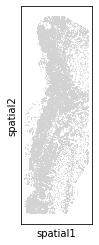

In [62]:
sc.pl.spatial(adata,spot_size=20)

In [39]:
allinformation.columns[0:17]=['Position', 'Sample_x', 'Donor ID', 'Donor', 'Gender', 'Age', 'Smoking',
       'Region', 'roi', 'X_x', 'Y_x', 'Cell class', 'Cell type',
       'Cell subtype', 'Sample', 'X', 'Y']

TypeError: Index does not support mutable operations

,Position,Sample_x,Donor ID,Donor,Gender,Age,Smoking,Region,roi,X_x,...,PBK,SPARCL1,FHOD3,RPS29,PLD5,S100A4,BPIFB1,CLDN5,FBLN1,RGCC
0,Proximal lung,689-LNG3,689.0,3.0,Male,41.0,Smoker,LNG3,00021-00025,3723.0,...,0,0,0,1,2,0,0,0,0,2
1,Proximal lung,689-LNG3,689.0,3.0,Male,41.0,Smoker,LNG3,00047-00072,4319.0,...,2,2,0,4,1,1,0,0,1,1
2,Proximal lung,689-LNG3,689.0,3.0,Male,41.0,Smoker,LNG3,00120-00177,3660.0,...,1,0,0,4,0,0,0,0,0,2
3,Proximal lung,689-LNG3,689.0,3.0,Male,41.0,Smoker,LNG3,00233-00311,4715.0,...,2,0,0,3,0,1,0,0,2,0
4,Proximal lung,689-LNG3,689.0,3.0,Male,41.0,Smoker,LNG3,00258-00335,3770.0,...,0,0,0,2,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22080-21497,NaN,...,0,0,0,0,0,0,0,0,0,0
22081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22081-21497,NaN,...,0,0,0,0,0,0,0,0,0,0
22082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22082-21499,NaN,...,0,0,0,0,0,0,0,0,0,0
22083,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22083-21499,NaN,...,0,0,0,0,0,0,0,0,0,0


In [15]:
csvs[1]

,Sample,roi,X,Y,SCGB3A2,ACAN,MUC5AC,CST3,S100A2,KRT15,...,PBK,SPARCL1,FHOD3,RPS29,PLD5,S100A4,BPIFB1,CLDN5,FBLN1,RGCC
0,689-LNG3,01665-01646,2082,1654,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,689-LNG3,11479-10334,2218,10345,0,0,0,0,2,2,...,0,0,0,3,0,1,0,0,0,0
2,689-LNG3,02887-02580,5621,2582,0,0,1,0,0,0,...,1,1,0,0,0,1,0,1,1,1
3,689-LNG3,10543-09770,4902,9771,1,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
4,689-LNG3,10619-09820,5339,9827,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22079,689-LNG3,22080-21497,1168,21514,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22080,689-LNG3,22081-21497,3144,21515,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22081,689-LNG3,22082-21499,1974,21518,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22082,689-LNG3,22083-21499,1030,21519,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
mainp=r'F:\SCRINSHOT_tissuumaps\healthy\tissuumaps-shared\spots'
folders=[f for f in os.listdir(mainp) if '.csv' not in f]

In [3]:
for f in folders:
    print(f)
    spl=f.split('-')
    filename=spl[0]+'_'+spl[1]+'_spots.csv'
    combined=[]
    allf=os.listdir(mainp+'/'+f)
    for ff in allf:
        exp=pd.read_csv(mainp+'/'+f+'/'+ff)
        exp=exp.loc[:,['X','Y']]
        exp['Gene']=ff.split('.csv')[0]
        combined.append(exp)
    allexp=pd.concat(combined)
    allexp.to_csv(mainp+'/'+filename)

# correcting scgb3a2 in 689_lng1


In [6]:
spots=pd.read_csv(r'F:\SCRINSHOT_tissuumaps\healthy\tissuumaps-shared\spots\689_LNG1_spots.csv')
newgene=pd.read_csv(r'F:\SCGB3A2.csv')
spots2=spots[~spots['Gene'].isin(['SCGB3A2'])]
g2=newgene.loc[:,['X','Y']]
g2=g2.reset_index()
g2['Gene']='SCGB3A2'
g2.columns=spots2.columns
spots3=pd.concat([spots2,g2],axis=0)
spots3.to_csv(r'F:\SCRINSHOT_tissuumaps\healthy\tissuumaps-shared\spots\689_LNG1_spots.csv')

modifying x axis in 583_lng2

In [31]:
spots=pd.read_csv(r'F:\SCRINSHOT_tissuumaps\healthy\tissuumaps-shared\spots\583_LNG2_spots.csv')


In [34]:
spots['X']=spots['X']-4180

In [36]:
spots=spots[spots['X']>0]

In [37]:
spots.to_csv(r'F:\SCRINSHOT_tissuumaps\healthy\tissuumaps-shared\spots\583_LNG2_spots.csv')
